# Basic Neural Networks
- Reference: https://www.youtube.com/watch?v=tUoUdOdTkRw
- After this lab, you will understand how to implement
    - Forward Propagation
    - Backward Propagation
    - Hidden Layers
    - Activation Function
    - Loss Function
    - Optimizer (Gradient Descent)
    - Others: Generate and visualize data points
   

## Forward Propagation

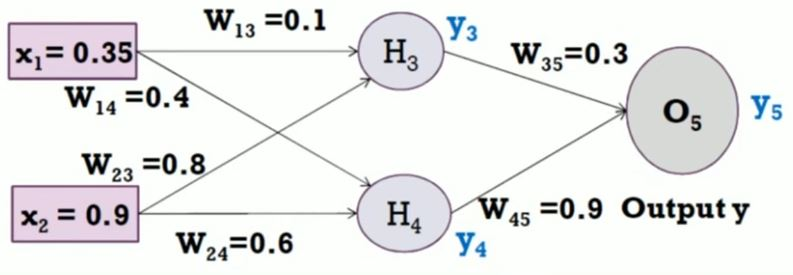

In [2]:
import torch

In [33]:
import torch
import torch.nn as nn
import torch.optim as optim
input = torch.tensor([[0.35, 0.9]], dtype=torch.float32)
output = torch.tensor([[0.5]], dtype=torch.float32)
class SimpleNet(nn.Module):
    def __init__(self):
        super(SimpleNet, self).__init__()
        self.fc1 = nn.Linear(2, 2, bias=False)
        self.fc2 = nn.Linear(2, 1, bias=False)
        self.fc1.weight.data = torch.tensor([[0.1, 0.8], [0.4, 0.6]])
        self.fc2.weight.data = torch.tensor([[0.3], [0.9]]).t()
    def forward(self, x):
        out = self.fc1(x)
        print("Calculation after Linear layer: \n", out)
        out = nn.Sigmoid()(out)
        print("Calculation after Sigmoid layer (Activation Layer): \n", out)
        out = self.fc2(out)
        out = nn.Sigmoid()(out)
        print("Calculation at final layer: \n", out)
        return out
    
    #-------------------------------------------------------------
    def backward(self, loss):
        self.zero_grad()
        loss.backward() 
        with torch.no_grad():
            self.fc1.weight.data -= self.fc1.weight.grad * learning_rate
            self.fc2.weight.data -= self.fc2.weight.grad * learning_rate
    #-------------------------------------------------------------
    
model = SimpleNet()
model(input)
print("")

Calculation after Linear layer: 
 tensor([[0.7550, 0.6800]], grad_fn=<MmBackward0>)
Calculation after Sigmoid layer (Activation Layer): 
 tensor([[0.6803, 0.6637]], grad_fn=<SigmoidBackward0>)
Calculation at final layer: 
 tensor([[0.6903]], grad_fn=<SigmoidBackward0>)



## Question 1:
Implement Backward Propagation to `SimpleNet` to calculate the updated weights.

In [34]:
model.state_dict()

OrderedDict([('fc1.weight',
              tensor([[0.1000, 0.8000],
                      [0.4000, 0.6000]])),
             ('fc2.weight', tensor([[0.3000, 0.9000]]))])

In [31]:
# Implement Question 1 here

learning_rate = 0.1
out = model.forward(input)
loss_fn = nn.MSELoss()
loss = loss_fn(out, output)
model.backward(loss)
model.fc1.weight.data, model.fc2.weight.data


Calculation after Linear layer: 
 tensor([[0.7550, 0.6800]], grad_fn=<MmBackward0>)
Calculation after Sigmoid layer (Activation Layer): 
 tensor([[0.6803, 0.6637]], grad_fn=<SigmoidBackward0>)
Calculation at final layer: 
 tensor([[0.6903]], grad_fn=<SigmoidBackward0>)


(tensor([[0.0998, 0.7995],
         [0.3994, 0.5985]]),
 tensor([[0.2945, 0.8946]]))

In [32]:
model.state_dict()

OrderedDict([('fc1.weight',
              tensor([[0.0998, 0.7995],
                      [0.3994, 0.5985]])),
             ('fc2.weight', tensor([[0.2945, 0.8946]]))])

In [36]:
out = model.forward(input)
loss_fn = nn.MSELoss()

optimizer = optim.SGD(model.parameters(), lr=0.01)
optimizer.zero_grad()
loss = loss_fn(out,output)
loss.backward()
optimizer.step()
model.fc1.weight.data, model.fc2.weight.data


Calculation after Linear layer: 
 tensor([[0.7550, 0.6800]], grad_fn=<MmBackward0>)
Calculation after Sigmoid layer (Activation Layer): 
 tensor([[0.6803, 0.6637]], grad_fn=<SigmoidBackward0>)
Calculation at final layer: 
 tensor([[0.6903]], grad_fn=<SigmoidBackward0>)


(tensor([[0.1000, 0.8000],
         [0.3999, 0.5999]]),
 tensor([[0.2994, 0.8995]]))

## Question 2:
Generate 1000 random data and use any libary to plot/visualize it.
```
newIntput = torch.tensor([[Data1, Data2],[Data3, Data4],.....], dtype=torch.float32)
newOutput = torch.tensor([[Data501],[Data502],......], dtype=torch.float32)
```

In [7]:
torch.manual_seed(42)

In [8]:
# Generate random numbers
random_numbers = (torch.rand(1000, 1) * 12) - 5
random_numbers = random_numbers.type(torch.FloatTensor)

# Generate random data
random_input = torch.randn(1000, 2)

# Generate random output
random_output = torch.randn(1000, 1)

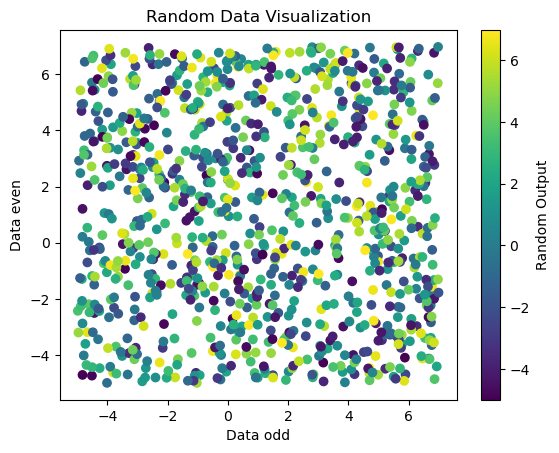

In [9]:
# Implement Question 2 here
import torch
import matplotlib.pyplot as plt

# Generate random data
random_input = (torch.rand(1000, 2) * 12) - 5
random_input = random_input.type(torch.FloatTensor)

# Generate random output
random_output = (torch.rand(1000, 1) * 12) - 5
random_output = random_output.type(torch.FloatTensor)

# Create a scatter plot
plt.scatter(random_input[:, 0], random_input[:, 1], c=random_output[:, 0])
plt.xlabel('Data odd')
plt.ylabel('Data even')
plt.colorbar(label='Random Output')
plt.title('Random Data Visualization')
plt.show()

newInput, newOutput = random_input, random_output

## Question 3:
Implement a new class `NeuralNet` that:
- Accept `newInput`
- Have 2 hidden layers with bias enabled, and use ReLU Activation Function
- Predict `newOutput `

In [48]:
# Implement Question 3 here
import torch
import torch.nn as nn

class NeuralNet(nn.Module):
    def __init__(self):
        super(NeuralNet, self).__init__()
        self.fc1 = nn.Linear(2, 4, bias = True)  # First hidden layer
        self.fcb = nn.Linear(4, 4, bias = True)  # Second hidden layer
        self.fc3 = nn.Linear(4, 1, bias = True)  # Output layer

    def forward(self, x):
        out = self.fc1(x)
        #print("Calculation after Linear layer 1: \n", out)
        out = torch.relu(out)  # Apply ReLU activation to the first hidden layer
        #print("Calculation after ReLU layer 1 (Activation Layer): \n", out)
        out = self.fcb(out)
        #print("Calculation after Linear layer 2: \n", out)
        out = torch.relu(out)  # Apply ReLU activation to the second hidden layer
        #print("Calculation after ReLU layer 2 (Activation Layer): \n", out)
        out = self.fc3(out)
        #print("Calculation after Linear layer 3: \n", out)
        out = torch.relu(out)  # Apply sigmoid activation to the output layer
        #print("Calculation at final layer (ReLU activation for layer 3): \n", out)
        return out

# Create an instance of the NeuralNet class
model2 = NeuralNet()

# Make predictions
predict_output = model2(newInput)

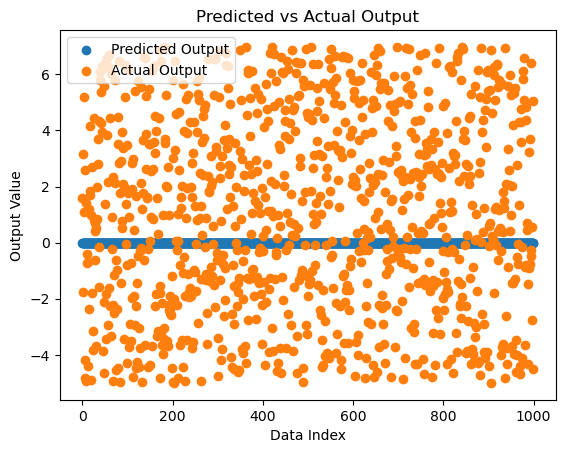

In [11]:
# Create a scatter plot
# Convert tensors to NumPy arrays for plotting
actual_output = newOutput.detach().numpy()
predicted_output = predict_output.detach().numpy()

# Create a scatter plot
plt.scatter(range(len(predicted_output)), predicted_output, label='Predicted Output')
plt.scatter(range(len(actual_output)), actual_output, label='Actual Output')
plt.xlabel('Data Index')
plt.ylabel('Output Value')
plt.legend()
plt.title('Predicted vs Actual Output')
plt.show()

## Question 4:
Implement a Loss Function and an Optimizer then train the `NeuralNet` with 1000 epochs. Then:
- Shows the accuracy. Example: `80%`
- Shows one prediction. Example: `testInput([0.1,0,2])` then predict `testOutput([0.3, 0,4])`

In [51]:
# Implement Question 4 here
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import r2_score

# Create an instance of the NeuralNet class
net = NeuralNet()

# Define the loss function
loss_fn = nn.MSELoss()

# Define the optimizer
optimizer = optim.SGD(net.parameters(), lr=0.01)

# Train the network for 1000 epochs
for epoch in range(1000):
    # Zero the gradients
    optimizer.zero_grad()

    # Forward pass
    output = net(newInput)

    # Calculate the loss
    loss = loss_fn(output, newOutput)

    # Backward pass
    loss.backward()

    # Update weights
    optimizer.step()

# Evaluate accuracy
predicted_output = net(newInput)
# Calculate the R2 score
r2 = r2_score(newOutput.detach().numpy(), predicted_output.detach().numpy())
print("R2 Score:", r2)

# Accuracy
predicted_output_rounded = torch.round(predicted_output)
accuracy = (predicted_output_rounded == torch.round(newOutput)).sum().item() / newOutput.size(0) * 100
print('Accuracy :',accuracy, "%")

R2 Score: 0.006744352928348629
Accuracy : 8.6 %


In [52]:
testInput = torch.tensor([[20, 30]], dtype=torch.float32)
testOutput = net(testInput)
print('testOutput: ',testOutput)

testOutput:  tensor([[1.5901]], grad_fn=<ReluBackward0>)


In [18]:
# Set the model to evaluation mode
model.eval()

# Forward pass to get the predicted outputs
with torch.no_grad():
    testOutput = net(testInput)
    
print('testOutput: ',testOutput)

testOutput:  tensor([[1.5272]])


<h2> Save Model </h2>

In [53]:
import torch

# Assuming you have a PyTorch model named 'model'
# and you want to save it to a file named 'model.pth'

# Save the entire model
torch.save(net, 'net.pth')

# Save only the model's state dictionary
torch.save(model.state_dict(), 'model_state.pth')

<h2> Load Model </h2>

In [54]:
# Load the saved model
load = torch.load('net.pth')

In [55]:
load

NeuralNet(
  (fc1): Linear(in_features=2, out_features=4, bias=True)
  (fcb): Linear(in_features=4, out_features=4, bias=True)
  (fc3): Linear(in_features=4, out_features=1, bias=True)
)

In [46]:
# If only the state dictionary was saved, load it as follows:
load.load_state_dict(torch.load('model_state.pth'))

RuntimeError: Error(s) in loading state_dict for NeuralNet:
	Missing key(s) in state_dict: "fc1.bias", "fc2.bias", "fc3.weight", "fc3.bias". 
	size mismatch for fc1.weight: copying a param with shape torch.Size([2, 2]) from checkpoint, the shape in current model is torch.Size([4, 2]).
	size mismatch for fc2.weight: copying a param with shape torch.Size([1, 2]) from checkpoint, the shape in current model is torch.Size([4, 4]).

In [41]:
load

SimpleNet(
  (fc1): Linear(in_features=2, out_features=2, bias=False)
  (fc2): Linear(in_features=2, out_features=1, bias=False)
)